In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
%matplotlib inline
df = pd.read_csv('Energy_Dataset.csv')
df.Timestamp = pd.to_datetime(df.Timestamp)
rel_df = df.drop(labels=['Postcode', 'Price_AUD/MWh', 'Total_Demand_MWh', 'Latitude','Longitude' ], axis = 1)
cust = rel_df.pivot_table(index='Timestamp',aggfunc='mean')

In [2]:
winter =['Winter: (July-2012)','2012-07-01','2012-07-31']
spring =['Spring: (October-2012)','2012-10-01','2012-10-31']
summer = ['Summer: (January-2013)','2013-01-01','2013-01-31']
autumn = ['Autumn: (April-2013)','2013-04-01','2013-04-30'] 

def seasonal(cust, season):
    sol = pd.DataFrame(cust.Solar_Production_kWh.loc[season[1]: season[2]])
    cons = pd.DataFrame(cust.Energy_Consumption_kWh.loc[season[1]: season[2]])
    heat = pd.DataFrame(cust.Heating_Consumption_kWh.loc[winter[1]: season[2]])
    
    sol.reset_index(inplace=True)
    sol = sol.astype({'Timestamp':'str'})
    sol['Hourly']= sol.Timestamp.str.split(' ', expand=True)[1]
    a = sol.drop(columns='Timestamp').pivot_table(index='Hourly',aggfunc='mean')
    a.index = season[1] +' ' + a.index
    a.index = pd.to_datetime(a.index)
    
    cons.reset_index(inplace=True)
    cons = cons.astype({'Timestamp':'str'})
    cons['Hourly']= cons.Timestamp.str.split(' ', expand=True)[1]
    b = cons.drop(columns='Timestamp').pivot_table(index='Hourly',aggfunc='mean')
    b.index = season[1] +' ' + b.index
    b.index = pd.to_datetime(b.index) 
    
    heat.reset_index(inplace=True)
    heat = heat.astype({'Timestamp':'str'})
    heat['Hourly']= heat.Timestamp.str.split(' ', expand=True)[1]
    c = heat.drop(columns='Timestamp').pivot_table(index='Hourly',aggfunc='mean')
    c.index = season[1] +' ' + c.index
    c.index = pd.to_datetime(c.index)
    
    return (a,b,c, season[0])

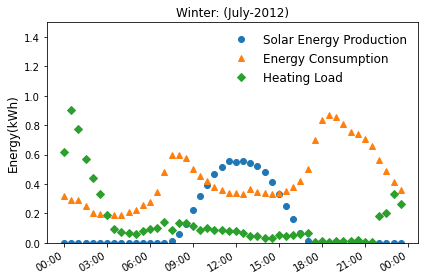

In [3]:
# winter
sol, cons, heat, season = seasonal(cust, winter)

plt.plot(sol[sol>0], marker='o', ls='', label='Solar Energy Production')
plt.plot(cons[cons>0], marker='^', ls='',label='Energy Consumption' )
plt.plot(heat[heat>0], marker='D', ls='', label='Heating Load')

plt.ylabel('Energy(kWh)',fontsize=12)
#plt.xlabel(season,fontsize=12)
plt.gca().set_ylim([0,1.5])

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(date_format)

plt.legend(loc=1, fontsize =12, frameon=False, ncol=1)
plt.title(season)
plt.tight_layout()
plt.show()

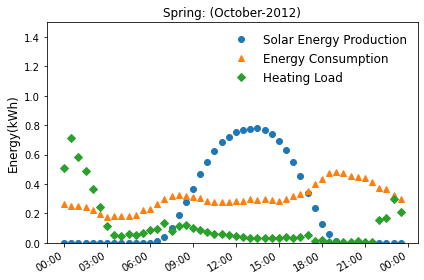

In [4]:
### spring
sol, cons, heat, season = seasonal(cust, spring)

plt.plot(sol[sol>0], marker='o', ls='', label='Solar Energy Production')
plt.plot(cons[cons>0], marker='^', ls='',label='Energy Consumption' )
plt.plot(heat[heat>0], marker='D', ls='', label='Heating Load')

plt.ylabel('Energy(kWh)',fontsize=12)
#plt.xlabel(season,fontsize=12)
plt.gca().set_ylim([0,1.5])

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(date_format)

plt.legend(loc=1, fontsize =12, frameon=False, ncol=1)
plt.title(season)
plt.tight_layout()
plt.show()

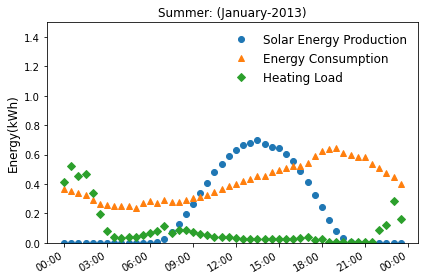

In [5]:
### summer
sol, cons, heat, season = seasonal(cust, summer)

plt.plot(sol[sol>0], marker='o', ls='', label='Solar Energy Production')
plt.plot(cons[cons>0], marker='^', ls='',label='Energy Consumption' )
plt.plot(heat[heat>0], marker='D', ls='', label='Heating Load')

plt.ylabel('Energy(kWh)',fontsize=12)
#plt.xlabel(season,fontsize=12)
plt.gca().set_ylim([0,1.5])

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(date_format)

plt.legend(loc=1, fontsize =12, frameon=False, ncol=1)
plt.title(season)
plt.tight_layout()
plt.show()

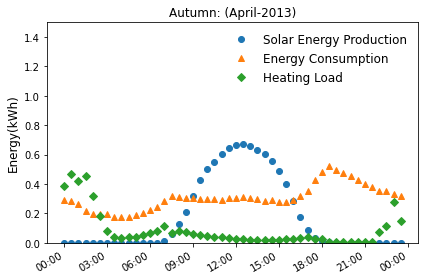

In [6]:
### autumn
sol, cons, heat, season = seasonal(cust, autumn)

plt.plot(sol[sol>0], marker='o', ls='', label='Solar Energy Production')
plt.plot(cons[cons>0], marker='^', ls='',label='Energy Consumption' )
plt.plot(heat[heat>0], marker='D', ls='', label='Heating Load')

plt.ylabel('Energy(kWh)',fontsize=12)
#plt.xlabel(season,fontsize=12)
plt.gca().set_ylim([0,1.5])

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(date_format)

plt.legend(loc=1, fontsize =12, frameon=False, ncol=1)
plt.title(season)
plt.tight_layout()
plt.show()